In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import denseRSRG as df
import exactdiago as ex
import infiniteDMRG as id

## $\lambda = 0$

In [2]:
l = 0   # lambda value of the trasverse field
threshold = 0    # Threshold value for the RSRG algorithm


# RSRG algorithm
N = 2   # Initial number of sites
max_iter_rsrg = 9       # Number of iterations of the algorithm; each completed iteration doubles the number of sites N -> 2N and cosequently 
                    # the dimension of the Hamiltonian H_2N (before the truncation) 2**N -> 2**2N
d_eff = 2**N    # Number of eigevalues to retrieve in order to build the projector

normgs_eigval_dict_rsrg, eigvec_rsrg, deltas_dim_rsrg, actual_dim_rsrg = df.real_space_rg(N, l, threshold, d_eff, max_iter_rsrg)
gs_eigval_rsrg = {N: N * en for N, en in normgs_eigval_dict_rsrg.items()}

theoretical_eigval_rsrg = {N: -(N-1) for N in normgs_eigval_dict_rsrg.keys()}
error_eigval_rsrg = {N: np.abs((gs_eigval_rsrg[N] - theoretical_eigval_rsrg[N])/theoretical_eigval_rsrg[N]) for N in normgs_eigval_dict_rsrg.keys()}


# Infinite-DMRG algorithm
m_max = 1   
max_iter_dmrg = int((actual_dim_rsrg-2)/2)        

normgs_eigval_dict_dmrg, eigvec_dmrg, deltas_dim_dmrg, actual_dim_dmrg = id.dmrg(l, m_max, threshold, max_iter_dmrg)
gs_eigval_dmrg = {N: N * en for N, en in normgs_eigval_dict_dmrg.items()}

theoretical_eigval_dmrg = {N: -(N-1) for N in normgs_eigval_dict_dmrg.keys()}
error_eigval_dmrg = {N: np.abs((gs_eigval_dmrg[N] - theoretical_eigval_dmrg[N])/theoretical_eigval_dmrg[N]) for N in normgs_eigval_dict_dmrg.keys()}

Convergence achieved at iteration 9: ε = -0.9990234375000011 

Converged reached for a system with N = 1024 sites, with precision: delta = 0.0009765624999986677
Reached N = 1024 with precision: delta = 1.91108121372352e-06


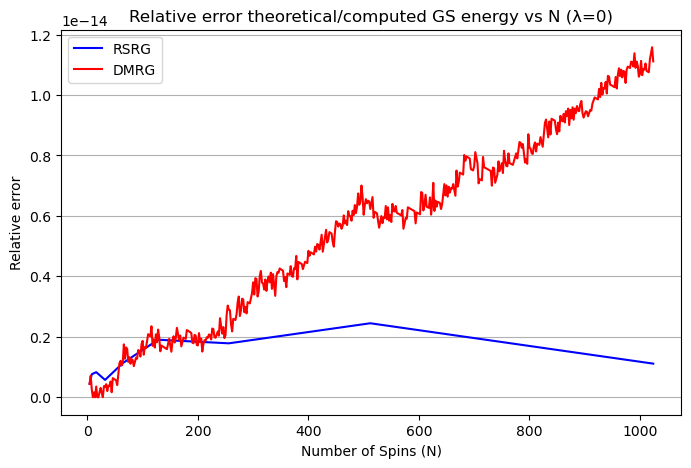

In [3]:
plt.figure(figsize=(8, 5))

plt.plot(list(error_eigval_rsrg.keys()),list(error_eigval_rsrg.values()), "-", color = "blue", label = "RSRG")

plt.plot(list(error_eigval_dmrg.keys()),list(error_eigval_dmrg.values()), "-", color = "red", label = "DMRG")


# plt.xscale('log')
plt.xlabel('Number of Spins (N)')
plt.ylabel('Relative error')
plt.title(f'Relative error theoretical/computed GS energy vs N (λ=0)')
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.show()

## $\lambda = \infty$

In [4]:
l = 500   # lambda value of the trasverse field
threshold = 0    # Threshold value for the RSRG algorithm


# RSRG algorithm
N = 2   # Initial number of sites
max_iter_rsrg = 9       # Number of iterations of the algorithm; each completed iteration doubles the number of sites N -> 2N and cosequently 
                    # the dimension of the Hamiltonian H_2N (before the truncation) 2**N -> 2**2N
d_eff = 2**N    # Number of eigevalues to retrieve in order to build the projector

normgs_eigval_dict_rsrg, eigvec_rsrg, deltas_dim_rsrg, actual_dim_rsrg = df.real_space_rg(N, l, threshold, d_eff, max_iter_rsrg)
gs_eigval_rsrg = {N: N * en for N, en in normgs_eigval_dict_rsrg.items()}

theoretical_eigval_rsrg = {N: -(l*N) for N in normgs_eigval_dict_rsrg.keys()}

error_eigval_rsrg = {N: np.abs((gs_eigval_rsrg[N] - theoretical_eigval_rsrg[N])/theoretical_eigval_rsrg[N]) for N in normgs_eigval_dict_rsrg.keys()}


# Infinite-DMRG algorithm
m_max = 1   
max_iter_dmrg = int((actual_dim_rsrg-2)/2)        

normgs_eigval_dict_dmrg, eigvec_dmrg, deltas_dim_dmrg, actual_dim_dmrg = id.dmrg(l, m_max, threshold, max_iter_dmrg)
gs_eigval_dmrg = {N: N * en for N, en in normgs_eigval_dict_dmrg.items()}

theoretical_eigval_dmrg = {N: -(l*N) for N in normgs_eigval_dict_dmrg.keys()}

error_eigval_dmrg = {N: np.abs((gs_eigval_dmrg[N] - theoretical_eigval_dmrg[N])/theoretical_eigval_dmrg[N]) for N in normgs_eigval_dict_dmrg.keys()}

Convergence achieved at iteration 9: ε = -500.00042387545244 

Converged reached for a system with N = 1024 sites, with precision: delta = 2.2737367544323206e-13
Reached N = 1024 with precision: delta = 9.553673407936003e-10


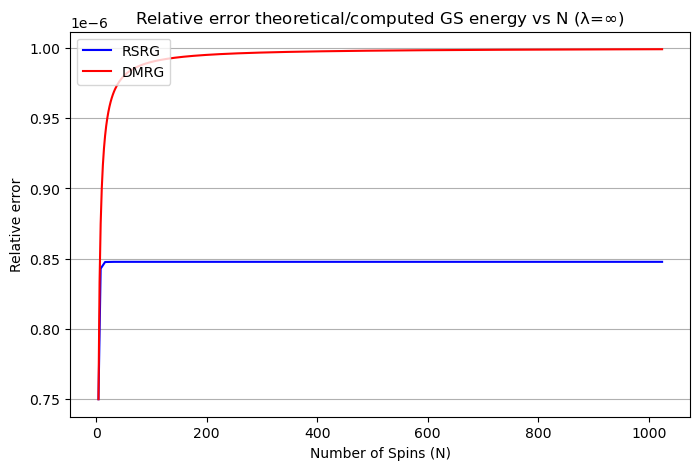

In [5]:
plt.figure(figsize=(8, 5))

plt.plot(list(error_eigval_rsrg.keys()),list(error_eigval_rsrg.values()), "-", color = "blue", label = "RSRG")

plt.plot(list(error_eigval_dmrg.keys()),list(error_eigval_dmrg.values()), "-", color = "red", label = "DMRG")


# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Number of Spins (N)')
plt.ylabel('Relative error')
plt.title(f'Relative error theoretical/computed GS energy vs N (λ=$\infty$)')
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.show()

Convergence achieved at iteration 9: ε = -1.231196029391363 

Converged reached for a system with N = 1024 sites, with precision: delta = 2.8789304273857397e-10
Reached N = 1024 with precision: delta = 5.119130381592285e-06


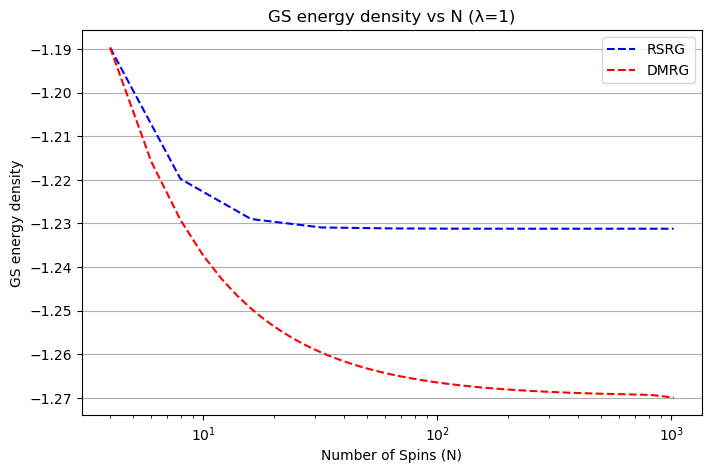

In [6]:
# PARAMETERS
l = 1   # lambda value of the trasverse field
threshold = 0    # Threshold value for the RSRG algorithm


# RSRG algorithm
N = 2   # Initial number of sites
max_iter_rsrg = 9       # Number of iterations of the algorithm; each completed iteration doubles the number of sites N -> 2N and cosequently 
                    # the dimension of the Hamiltonian H_2N (before the truncation) 2**N -> 2**2N
d_eff = 2**N  

normgs_eigval_dict_rsrg, _, _, actual_dim_rsrg = df.real_space_rg(N, l, threshold, d_eff, max_iter_rsrg)


# Infinite-DMRG
m_max = 1   
max_iter_dmrg = int((actual_dim_rsrg-2)/2)  

normgs_eigval_dict_dmrg, _, _, _ = id.dmrg(l, m_max, threshold, max_iter_dmrg)


# PLOT
plt.figure(figsize=(8, 5))

plt.plot(list(normgs_eigval_dict_rsrg.keys()),list(normgs_eigval_dict_rsrg.values()), "--", color = "blue", label ="RSRG")
plt.plot(list(normgs_eigval_dict_dmrg.keys()),list(normgs_eigval_dict_dmrg.values()), "--", color = "red", label = "DMRG")

plt.xscale('log')
plt.xlabel('Number of Spins (N)')
plt.ylabel('GS energy density')
plt.title(f'GS energy density vs N (λ={l})')
plt.legend(loc='upper right')
plt.grid(axis='y')

plt.show()

In [7]:
# PARAMETERS
l_extreme = 4
l_values = np.linspace(-l_extreme, l_extreme, 50)
threshold = 0    # Threshold value for the RSRG algorithm


# RSRG algorithm
N = 2   # Initial number of sites
max_iter_rsrg = 12       # Number of iterations of the algorithm; each completed iteration doubles the number of sites N -> 2N and cosequently 
                    # the dimension of the Hamiltonian H_2N (before the truncation) 2**N -> 2**2N
actual_dim_rsrg = 2*(2**max_iter_rsrg)

eigval_dict_rsrg, _ = df.update_hamiltonian(N, l_values, threshold, max_iter_rsrg)

last_gs_energy_dict_rsrg = {key: list(inner_dict.values())[-1] for key, inner_dict in eigval_dict_rsrg.items()}


# Infinite-DMRG
m_max = 1   
max_iter_dmrg = int((actual_dim_rsrg-2)/2)  

eigval_dict_dmrg, _ = id.update_hamiltonian(m_max, l_values, threshold, max_iter_dmrg)

last_gs_energy_dict_dmrg = {key: list(inner_dict.values())[-1] for key, inner_dict in eigval_dict_dmrg.items()}





# # Fit
# def mf_fit(l_values, A, B, C):
#     l_values = np.asarray(l_values)  
#     e = np.where(
#         (l_values >= -C) & (l_values <= C),  
#         - 1 - (l_values**2)*A,
#         -np.abs(l_values)*B
#     )
#     return e

# initial_guess = [0.25, 1, 2]
# params, _ = curve_fit(mf_fit, list(last_gs_energy_dict.keys()), list(last_gs_energy_dict.values()), p0=initial_guess)
# A = params[0]
# B = params[1]    
# C = params[2]

# print(f"Fitted parameters:\n A = {A:.4f}, B = {B:.4f}, C = {C:.4f}")

# s_vals = np.linspace(-l_extreme, l_extreme, 100)
# fitted = mf_fit(s_vals, A, B, C)

Convergence achieved at iteration 12: ε = -4.054000283118118 

Converged reached for a system with N = 8192 sites, with precision: delta = 8.881784197001252e-16
Convergence achieved at iteration 12: ε = -3.89308445789344 

Converged reached for a system with N = 8192 sites, with precision: delta = 2.6645352591003757e-15
Convergence achieved at iteration 12: ε = -3.7323829869900997 

Converged reached for a system with N = 8192 sites, with precision: delta = 4.884981308350689e-15
Convergence achieved at iteration 12: ε = -3.5719267129873247 

Converged reached for a system with N = 8192 sites, with precision: delta = 1.7763568394002505e-15
Convergence achieved at iteration 12: ε = -3.4117527183443217 

Converged reached for a system with N = 8192 sites, with precision: delta = 3.1086244689504383e-15
Convergence achieved at iteration 12: ε = -3.251905994833928 

Converged reached for a system with N = 8192 sites, with precision: delta = 4.884981308350689e-15
Convergence achieved at itera

KeyboardInterrupt: 

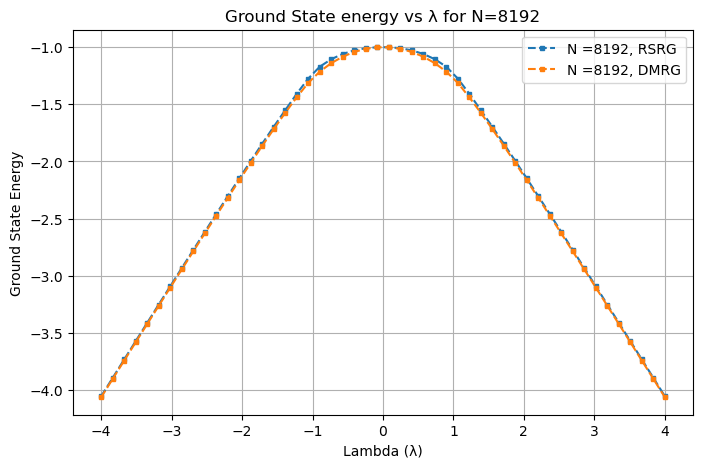

In [37]:
plt.figure(figsize=(8, 5))

plt.plot(last_gs_energy_dict_rsrg.keys(), last_gs_energy_dict_rsrg.values(), "s--", markersize = 3, label=f'N ={actual_dim_rsrg}, RSRG')
plt.plot(last_gs_energy_dict_dmrg.keys(), last_gs_energy_dict_dmrg.values(), "s--", markersize = 3, label=f'N ={actual_dim_rsrg}, DMRG')

# plt.plot(s_vals, fitted, 'r--', label=f"Fitted curve; A = {A:.4f}, B = {B:.4f}, C = {C:.4f}")

# plt.axvline(-2, color='red', linestyle='--', label='λ = -1')
# plt.axvline(2, color='red', linestyle='--', label='λ = +1')
plt.xlabel('Lambda (λ)')
plt.ylabel('Ground State Energy')
plt.title(f'Ground State energy vs λ for N={actual_dim_rsrg}')
plt.legend()
plt.grid(True)

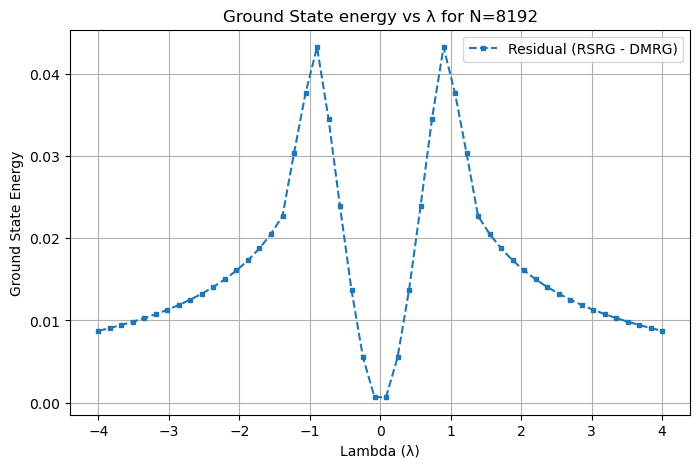

In [ ]:
plt.figure(figsize=(8, 5))

# residual = list(last_gs_energy_dict_rsrg.values()) - list(last_gs_energy_dict_dmrg.values())

residual = [list(last_gs_energy_dict_rsrg.values())[i] - list(last_gs_energy_dict_dmrg.values())[i] for i in range(len(list(last_gs_energy_dict_dmrg.values())))]

plt.plot(last_gs_energy_dict_rsrg.keys(), residual, "s--", markersize = 3, label=f'Residual (RSRG - DMRG)')
# plt.plot(s_vals, fitted, 'r--', label=f"Fitted curve; A = {A:.4f}, B = {B:.4f}, C = {C:.4f}")

# plt.axvline(-2, color='red', linestyle='--', label='λ = -1')
# plt.axvline(2, color='red', linestyle='--', label='λ = +1')
plt.xlabel('Lambda (λ)')
plt.ylabel('Residual Ground State Energy')
plt.title(f'Residual Ground State energy vs λ for N={actual_dim_rsrg}')
plt.legend()
plt.grid(True)

## Convergence of the algorithms

I fix the dimension equal for both the algorithm, set the threshold to 0, and compute the deltas for the algorithm <br>

One can set the threshold drawing an horizontal line to a specific value, and seeing which algorithm arrives before at convergence (i.e. the algorithm having the minimum of N, meaning that it arrives before the other at the thermodynamic limit).<br>
On the other hand, one can set the final dimension of the system drawing a vertical line to a specific value, and seeing which algorithm has the minimum delta (i.e. the algorithm which has convergeed more than the other) <br>

As one can see, before the critical value, the DMRG seems to work better, and after the critical value the RSRG. Instead, at values near the critical one strage behaviour happens and they seem to be more or less comparable.

Convergence achieved at iteration 9: ε = -0.9990234375000011 

Converged reached for a system with N = 1024 sites, with precision: delta = 0.0009765624999986677
Reached N = 1024 with precision: delta = 1.91108121372352e-06


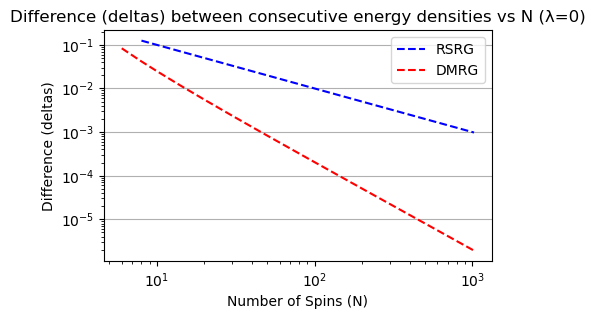

Convergence achieved at iteration 9: ε = -1.0435477155640869 

Converged reached for a system with N = 1024 sites, with precision: delta = 0.0007274373671861678
Reached N = 1024 with precision: delta = 1.7628902320154793e-06


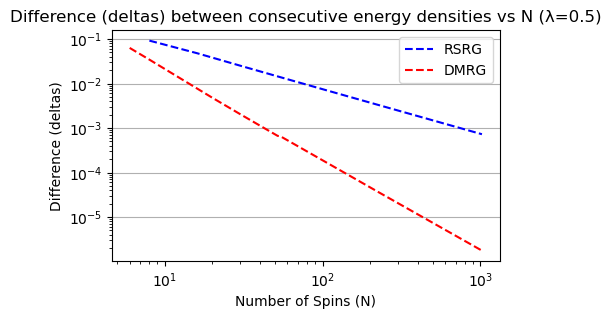

Convergence achieved at iteration 9: ε = -1.0658537093394744 

Converged reached for a system with N = 1024 sites, with precision: delta = 0.000612791833723314
Reached N = 1024 with precision: delta = 1.8474035394788757e-06


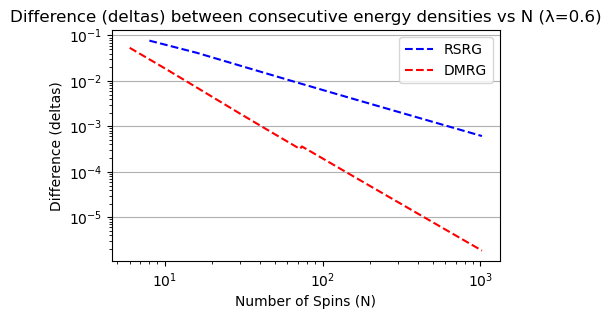

Convergence achieved at iteration 9: ε = -1.0939552125327565 

Converged reached for a system with N = 1024 sites, with precision: delta = 0.0004724510227454015
Reached N = 1024 with precision: delta = 2.2138599820031857e-06


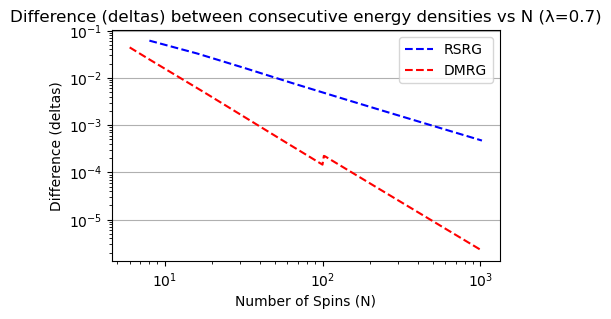

Convergence achieved at iteration 9: ε = -1.1288083329699392 

Converged reached for a system with N = 1024 sites, with precision: delta = 0.00030251306652395726
Reached N = 1024 with precision: delta = 3.510731040101689e-06


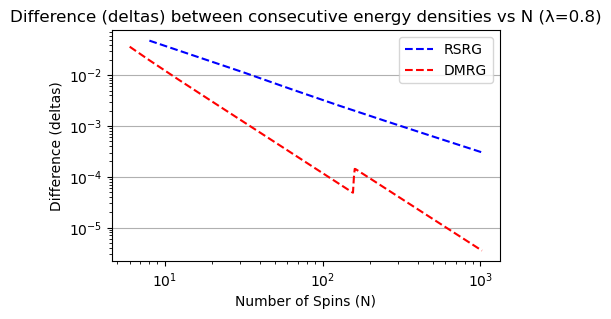

Convergence achieved at iteration 9: ε = -1.1721264798971462 

Converged reached for a system with N = 1024 sites, with precision: delta = 9.369034902362294e-05
Reached N = 1024 with precision: delta = 5.99091033626209e-06


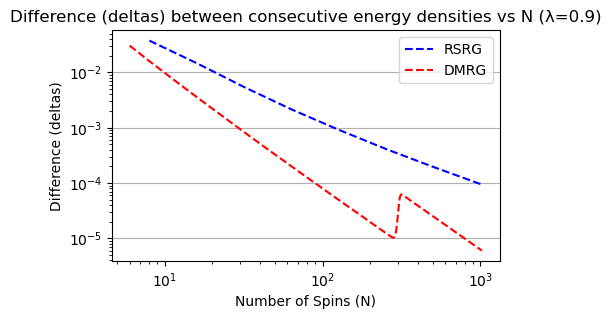

Convergence achieved at iteration 9: ε = -1.231196029391363 

Converged reached for a system with N = 1024 sites, with precision: delta = 2.8789304273857397e-10
Reached N = 1024 with precision: delta = 5.119130381592285e-06


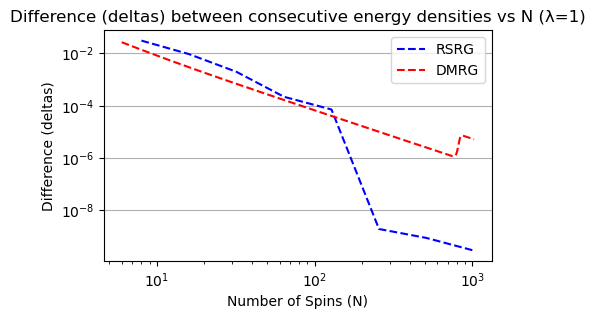

Convergence achieved at iteration 9: ε = -1.304195034988877 

Converged reached for a system with N = 1024 sites, with precision: delta = 3.970646034190395e-11
Reached N = 1024 with precision: delta = 5.288568090122681e-07


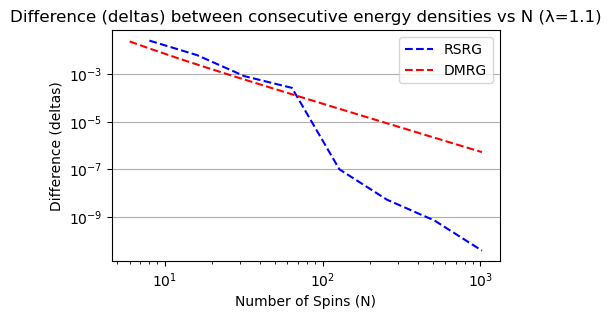

Convergence achieved at iteration 9: ε = -1.384467571622456 

Converged reached for a system with N = 1024 sites, with precision: delta = 1.1301093394422423e-10
Reached N = 1024 with precision: delta = 4.6632743533336907e-07


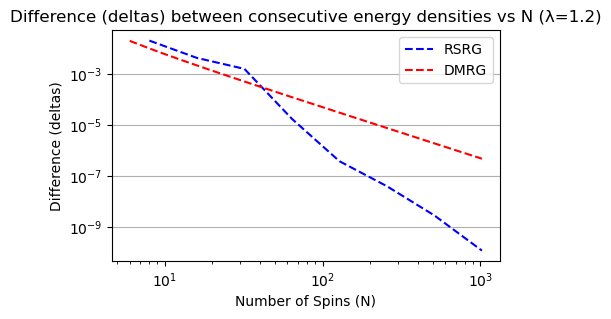

Convergence achieved at iteration 9: ε = -1.4762205725862465 

Converged reached for a system with N = 1024 sites, with precision: delta = 1.068800603576392e-09
Reached N = 1024 with precision: delta = 4.186673419059872e-07


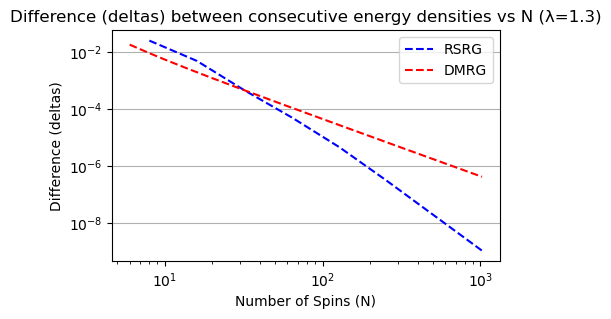

Convergence achieved at iteration 9: ε = -1.5623558875957078 

Converged reached for a system with N = 1024 sites, with precision: delta = 5.753495457838653e-10
Reached N = 1024 with precision: delta = 3.8079082864683755e-07


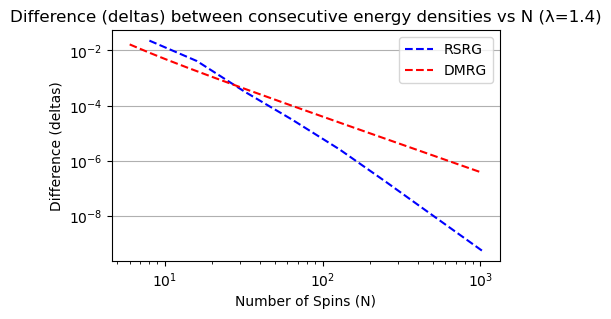

Convergence achieved at iteration 9: ε = -10.02134324533884 

Converged reached for a system with N = 1024 sites, with precision: delta = 3.007372129104624e-12
Reached N = 1024 with precision: delta = 4.786691398805942e-08


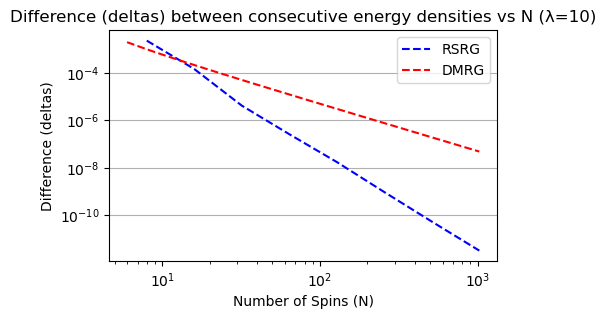

Convergence achieved at iteration 9: ε = -100.0021205547476 

Converged reached for a system with N = 1024 sites, with precision: delta = 2.5579538487363607e-13
Reached N = 1024 with precision: delta = 4.777703566105629e-09


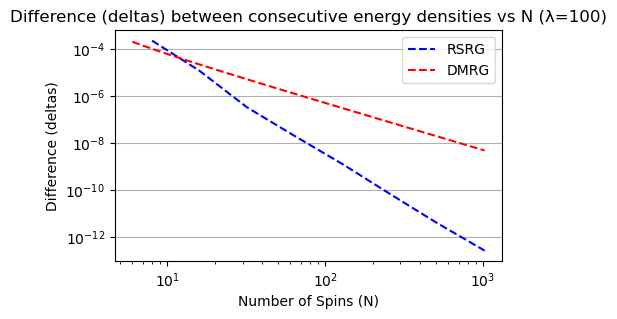

In [10]:
l_values = [0, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 10, 100]   # lambda value of the trasverse field
threshold = 0    # Threshold value for the RSRG algorithm

for l in l_values:
    # RSRG algorithm
    N = 2   # Initial number of sites
    max_iter_rsrg = 9       # Number of iterations of the algorithm; each completed iteration doubles the number of sites N -> 2N and cosequently 
                        # the dimension of the Hamiltonian H_2N (before the truncation) 2**N -> 2**2N
    d_eff = 2**N    # Number of eigevalues to retrieve in order to build the projector
    
    normgs_eigval_dict_rsrg, eigvec_rsrg, deltas_dim_rsrg, actual_dim_rsrg = df.real_space_rg(N, l, threshold, d_eff, max_iter_rsrg)
    
    
    # Infinite-DMRG algorithm
    m_max = 1   
    max_iter_dmrg = int((actual_dim_rsrg-2)/2)        
    
    normgs_eigval_dict_dmrg, eigvec_dmrg, deltas_dim_dmrg, actual_dim_dmrg = id.dmrg(l, m_max, threshold, max_iter_dmrg)
    
    plt.figure(figsize=(5, 3))
    plt.plot(list(deltas_dim_rsrg.keys())[1:],list(deltas_dim_rsrg.values())[1:], "--", color = "blue", label = "RSRG")
    plt.plot(list(deltas_dim_dmrg.keys()),list(deltas_dim_dmrg.values()), "--", color = "red",  label = "DMRG")
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Number of Spins (N)')
    plt.ylabel('Difference (deltas)')
    plt.title(f'Difference (deltas) between consecutive energy densities vs N (λ={l})')
    plt.legend(loc='upper right')
    plt.grid(axis='y')
    plt.show()